In [10]:
from __future__ import print_function, division
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
v = np.array([4,3])
t = np.array([1,1])
n = np.array([1,-1])

In [18]:
print(np.dot(t,n), np.dot(v,n), np.dot(v,t), np.dot(v,n)*n, np.dot(v,v), np.dot(v,v), v/(np.sqrt(v[0]**2 + v[1]**2)))
print(np.inner(t,n), np.inner(v,n), np.inner(v,t), np.inner(v,n)*n, np.inner(v,v))


0 1 7 [ 1 -1] 25 25 [ 0.8  0.6]
0 1 7 [ 1 -1] 25


In [19]:
Cp = np.array([3,4])
Cp_len = np.sqrt(np.sum(Cp**2))
Cs = Cp/Cp_len
Cs_len = np.sqrt(np.sum(Cs**2))
print(Cp, Cp_len, Cs, Cs_len)

[3 4] 5.0 [ 0.6  0.8] 1.0


In [20]:
Cn = np.array([-4,3])
np.dot(Cp,Cn)

0

## Implicit Representation

$$
\begin{align}
C &= \{(x,y) | \phi(x,y) = 0\}
\end{align}
$$

### Curve Normal
$$
\begin{align}
\vec N &= - \frac{\nabla \phi}{|\nabla \phi|}
\end{align}
$$

### Curvature
$$
\begin{align}
\kappa &= \text{div} \left ( \frac{\nabla \phi}{|\nabla \phi|} \right ) \\
\text{div}(\alpha, \beta) &= \frac{\partial \alpha}{\partial x} + 
\frac{\partial \beta}{\partial y} \\
\nabla \phi &= \left ( \nabla_x \phi, \nabla_y \phi \right ) \\
\kappa &= \frac{1}{|\nabla \phi|} \left (
\frac{\partial \nabla_x \phi}{\partial x} + 
\frac{\partial \nabla_y \phi}{\partial y} 
\right )\\
\end{align}
$$

## Curve Motion

### Normal Motion
$$
\begin{align}
\frac{dC}{dt} &= V \vec N\\
0 &= \frac{\partial \phi(x,y,t)}{\partial t}\\
&= \phi_x x_t + \phi_y y_t + \phi_t \\
- \phi_t &= \phi_x x_t + \phi_y y_t  \\
&= < \nabla \phi, C_t > \\
&= < \nabla \phi, V \vec N > \\
&= V < \nabla \phi, \vec N > \\
\vec N &= - \frac{\nabla \phi}{|\nabla \phi|} \\
- \phi_t &= - V < \nabla \phi, \frac{\nabla \phi}{|\nabla \phi|} > \\
\phi_t &= V |\nabla \phi| \\
\end{align}
$$

### Curvature Motion
$$
\begin{align}
- \phi_t &= < \nabla \phi, C_t > \\
&= < \nabla \phi, \kappa \vec N > \\
\vec N &= - \frac{\nabla \phi}{|\nabla \phi|} \\
\kappa &= \text{div} \left ( \frac{\nabla \phi}{|\nabla \phi|} \right ) \\
\kappa \vec N &= - \left ( \text{div} 
\left (\frac{\nabla \phi}{|\nabla \phi|} \right ) \right )
\left ( \frac{\nabla \phi}{|\nabla \phi|} \right ) \\
\kappa \vec N &= \frac{1}{|\nabla \phi|} \left (
\frac{\partial \nabla_x \phi}{\partial x} + 
\frac{\partial \nabla_y \phi}{\partial y} \right ) 
\left ( \frac{\nabla \phi}{|\nabla \phi|} \right )\\
\end{align}
$$


$$
\begin{align}
- \phi_t &= < \nabla \phi, C_t > \\
&= < \nabla \phi, \kappa \vec N > \\
\vec N &= - \frac{\nabla \phi}{|\nabla \phi|} \\
\kappa &= \text{div} \left ( \frac{\nabla \phi}{|\nabla \phi|} \right ) \\
\end{align}
$$

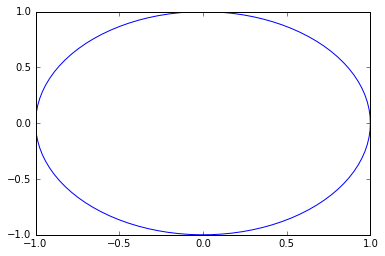

In [12]:
p = np.linspace(0,1,100)
theta = p*2*np.pi
theta
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x,y)

$$
\begin{align}
| C_s | &= < C_s, C_s > &= 1 \\
\frac{\partial}{\partial s} < C_s, C_s > &= \frac{\partial}{\partial s} 1 \\
< C_s, C_{ss} > &= 0 \\
\end{align}
$$

The inner product of two vectors is zero only if the two vectors are perpendicular.  So,
$$
\begin{align}
C_s \perp C_{ss}\\
\end{align}
$$


In [47]:
phi = np.zeros((6,5))-1
phi[3:,2:] = 1
phi[2,3:]= 0
phi[3,2] = 0
phi[4:,1] = 0
phi

array([[-1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1.],
       [-1., -1., -1.,  0.,  0.],
       [-1., -1.,  0.,  1.,  1.],
       [-1.,  0.,  1.,  1.,  1.],
       [-1.,  0.,  1.,  1.,  1.]])

In [32]:
from scipy import ndimage


In [49]:
kx = np.zeros((3,3))
kx[1,0] = 1
kx[1,1] = -1
kx
ky = np.zeros((3,3))
ky[0,1] = 1
ky[1,1] = -1
print(kx)
print(ky)


[[ 0.  0.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  0.]]
[[ 0.  1.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  0.]]


In [52]:
phix = ndimage.convolve(phi, kx)
phiy = ndimage.convolve(phi, ky)
phim = np.sqrt(phix**2 + phiy**2)
print("phix")
print(phix)
print("phiy")
print(phiy)
print("phim")
print(phim)


phix
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  1.  1.  0.  0.]
 [ 1.  1.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.]]
phiy
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.]
 [ 0.  0.  1.  1.  1.]
 [ 0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
phim
[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          1.        ]
 [ 0.          0.          1.41421356  1.          1.        ]
 [ 0.          1.41421356  1.41421356  0.          0.        ]
 [ 1.          1.          0.          0.          0.        ]
 [ 1.          1.          0.          0.          0.        ]]


In [57]:
mask = phi == 0
print(mask)
phix[mask]/phim[mask]

[[False False False False False]
 [False False False False False]
 [False False False  True  True]
 [False False  True False False]
 [False  True False False False]
 [False  True False False False]]


array([ 0.        ,  0.        ,  0.70710678,  1.        ,  1.        ])

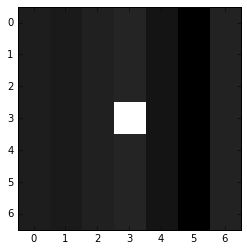

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# load image
img = np.array([[21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 99.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0]])
# print "image =", img

# compute gradient of image
gx, gy = np.gradient(img)
# print "gx =", gx
# print "gy =", gy
g = np.gradient(img)
# print "g"
# print g
plt.imshow(img/np.max(img), cmap='gray', interpolation='nearest')

# plt.imshow(g, cmap='gray', interpolation='nearest')


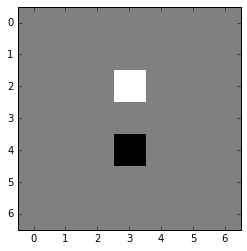

In [23]:
plt.imshow(gx, cmap='gray', interpolation='nearest')


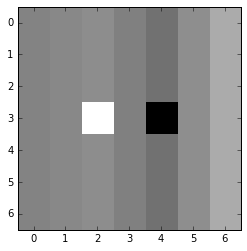

In [24]:
plt.imshow(gy, cmap='gray', interpolation='nearest')

In [10]:
def divergence(field):
    "return the divergence of a n-D field"
    return np.sum(np.gradient(field),axis=0)

image = [[ 21.  20.  22.  24.  18.  11.  23.]
 [ 21.  20.  22.  24.  18.  11.  23.]
 [ 21.  20.  22.  24.  18.  11.  23.]
 [ 21.  20.  22.  99.  18.  11.  23.]
 [ 21.  20.  22.  24.  18.  11.  23.]
 [ 21.  20.  22.  24.  18.  11.  23.]
 [ 21.  20.  22.  24.  18.  11.  23.]]
gx = [[  0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.   37.5   0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.  -37.5   0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0. ]]
gy = [[ -1.    0.5   2.   -2.   -6.5   2.5  12. ]
 [ -1.    0.5   2.   -2.   -6.5   2.5  12. ]
 [ -1.    0.5   2.   -2.   -6.5   2.5  12. ]
 [ -1.    0.5  39.5  -2.  -44.    2.5  12. ]
 [ -1.    0.5   2.   -2.   -6.5   2.5  12. ]
 [ -1.    0.5   2.   -2.   -6.5   2.5  12. ]
 [ -1.    0.5   2.   -2.   -6.5   2.5  12. ]]


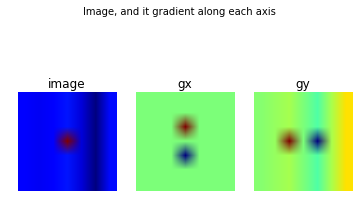

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# load image
img = np.array([[21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 99.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0],
                [21.0, 20.0, 22.0, 24.0, 18.0, 11.0, 23.0]])
print "image =", img

# compute gradient of image
gx, gy = np.gradient(img)
print "gx =", gx
print "gy =", gy

# plotting
plt.close("all")
plt.figure()
plt.suptitle("Image, and it gradient along each axis")
ax = plt.subplot("131")
ax.axis("off")
ax.imshow(img)
ax.set_title("image")

ax = plt.subplot("132")
ax.axis("off")
ax.imshow(gx)
ax.set_title("gx")

ax = plt.subplot("133")
ax.axis("off")
ax.imshow(gy)
ax.set_title("gy")